In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

# Regression metrics

$$\text{Mean Squared Error} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2$$

$$\text{Mean Absolute Error} = \frac{1}{N} \sum_{i=1}^{N} \left | \hat{y}_i - y_i \right |$$

$$\text{Root Mean Squared Error} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2}$$

$$R^2 = 1 - \frac{\sum_{i=1}^{N} (\hat{y}_i - y_i)^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2} = 1 - \frac{\text{MSE}}{\sigma^2}$$

In [15]:
def _mean_squared_error(y_test, y_pred):
    return np.mean((y_test - y_pred)**2)

def _mean_absolute_error(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))

def _root_mean_squared_error(y_test, y_pred):
    return np.sqrt(_mean_squared_error(y_test, y_pred))

def _r2_score(y_test, y_pred):
    return 1 - _mean_squared_error(y_test, y_pred) / np.var(y_test) 

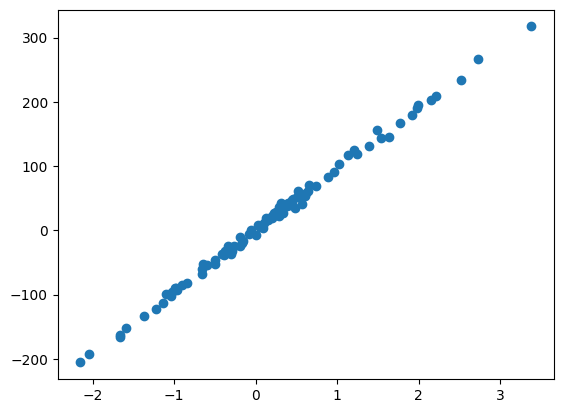

In [16]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=90, n_features=1, n_informative=2, noise=5)
plt.scatter(X, y)
plt.show()

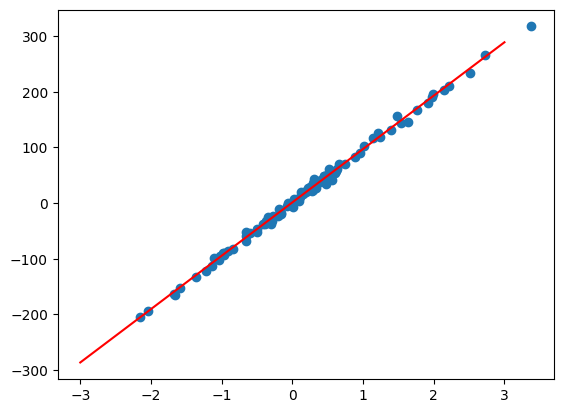

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X, y)
x = np.linspace(-3, 3, 100)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red')
plt.show()

In [18]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'Root mean squared error: {np.sqrt(mse)}')
print(f'R2 score: {r2}')

Mean absolute error: 4.064708132001953
Mean squared error: 27.955097513343482
Root mean squared error: 5.2872580335504225
R2 score: 0.9977882664987282


In [19]:
mae = _mean_absolute_error(y_test, y_pred)
mse = _mean_squared_error(y_test, y_pred)
rmse = _root_mean_squared_error(y_test, y_pred)
r2 = _r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'Root mean squared error: {rmse}')
print(f'R2 score: {r2}')

Mean absolute error: 4.064708132001953
Mean squared error: 27.955097513343482
Root mean squared error: 5.2872580335504225
R2 score: 0.9977882664987282



# Classification metrics

$$\text{Accuracy} = \frac{1}{N} \sum_{i=1}^{N} 1\{\hat{y}_i = y_i\}$$

$$
\text{Confusion Matrix} =

\left(
\begin{matrix}
  \text{TN} & \text{FP} \\
  \text{FN} & \text{TP}
\end{matrix}
\right)
$$

$$
\begin{align*}
\text{Precision} &= \frac{\text{TP}}{\text{TP} + \text{FP}}, & 0 < P < 1 \\
\end{align*}
$$

$$
\begin{align*}
\text{Recall} &= \frac{\text{TP}}{\text{TP} + \text{FN}}, & 0 < R < 1
\end{align*}
$$

$$\text{F1 Score} = \frac{2}{ \frac{1}{\text{Precision}} + \frac{1}{\text{Recall}} } = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

In [20]:
def _accuracy_score(y_test, y_pred):
    return np.mean(y_test==y_pred)

def _confusion_matrix(y_test, y_pred):
    tp, fn, fp, tn = 0, 0, 0, 0

    for y_t, y_p in zip(y_test, y_pred):

        if y_t == 1 and y_p == 1:
            tp += 1

        elif y_t == 1 and y_p == 0:
            fp += 1

        elif y_t == 0 and y_p == 1:
            fn += 1

        elif y_t == 0 and y_p == 0:
            tn += 1

    return np.array([[tn, fn],
                     [fp, tp]])

def _precision_score(y_test, y_pred):
    tp, fp = 0, 0

    for y_t, y_p in zip(y_test, y_pred):

        if y_t == 1 and y_p == 1:
            tp += 1

        elif y_t == 0 and y_p == 1:
            fp += 1

    return tp / (tp + fp)

def _recall_score(y_test, y_pred):
    tp, fn = 0, 0

    for y_t, y_p in zip(y_test, y_pred):

        if y_t == 1 and y_p == 1:
            tp += 1

        elif y_t == 1 and y_p == 0:
            fn += 1

    return tp / (tp + fn)

def _f1_score(y_test, y_pred):

    precision = _precision_score(y_test, y_pred)
    recall = _recall_score(y_test, y_pred)

    return 2 * precision * recall / (precision + recall)

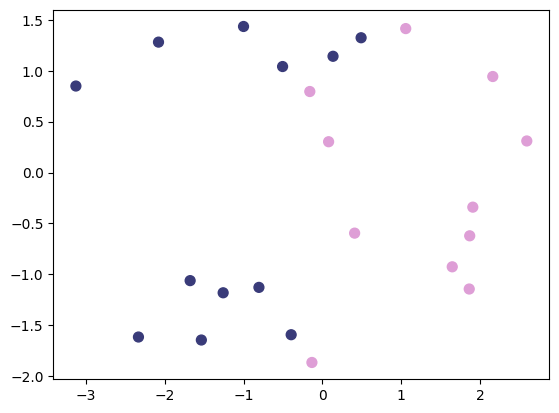

In [21]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=23, n_features=2, n_informative=2, n_redundant=0)
plot_2d_clf_problem(X, y)

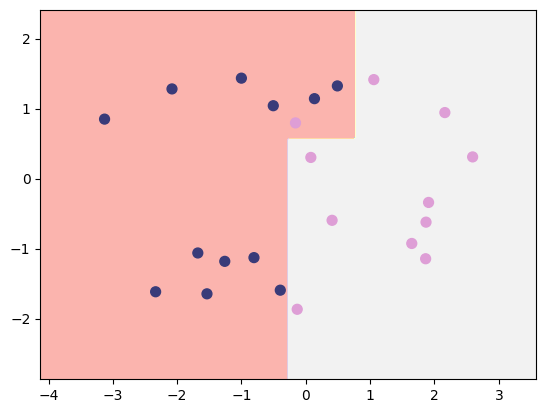

In [22]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_2d_clf_problem(X, y, model.predict)

In [23]:
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score)

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy score: 0.9
Confusion matrix: 
[[5 0]
 [1 4]]
Precision score: 1.0
Recall score: 0.8
F1 score: 0.888888888888889


In [24]:
print(f'Accuracy score: {_accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix: \n{_confusion_matrix(y_test, y_pred)}')
print(f'Precision score: {_precision_score(y_test, y_pred)}')
print(f'Recall score: {_recall_score(y_test, y_pred)}')
print(f'F1 score: {_f1_score(y_test, y_pred)}')

Accuracy score: 0.9
Confusion matrix: 
[[5 0]
 [1 4]]
Precision score: 1.0
Recall score: 0.8
F1 score: 0.888888888888889


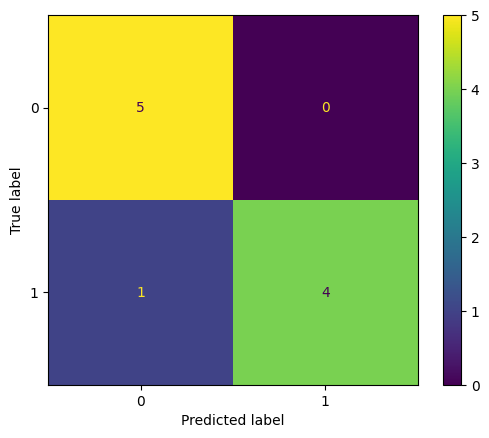

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()